# Exploratory Data Analysis

In this notebook we will carry out the Exploratory Data Analysis needed to understand the data we have available in our dataset, in order to create the most effective machine learning models possible. Our goal will be to analyse each variable's behaviour, with the aim of finding any possible outliers or missing values, as well as plotting this information for us to be easier to interpret it.

In [40]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# importing the dataset
df_raw = pd.read_csv("../data/raw/predictive_maintenance.csv")

In [23]:
# first five records of the dataset
df_raw.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# Understanding the dataset

In [24]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Our dataset is composed by 10000 records of a certain machine's production. It includes 10 columns, each one representing the values of some variables at the moment of production, as well as two target columns, one of them being a boolean variable -whether the machine failed or not- and the other being the kind of failure that the machine experimented. There are no null records in the dataset.

We will now proceed to analyse the information that each one of the columns provides us:

### 1. UDI

In [25]:
df_raw["UDI"].head()

0    1
1    2
2    3
3    4
4    5
Name: UDI, dtype: int64

This column is the unique identifier for each record of the dataset. We will not analyse this column as it will not provide us any relevant information.

### 2. Product ID & 3. Type

In [26]:
df_raw["Product ID"].head()

0    M14860
1    L47181
2    L47182
3    L47183
4    L47184
Name: Product ID, dtype: object

In [27]:
df_raw["Type"].head()

0    M
1    L
2    L
3    L
4    L
Name: Type, dtype: object

These two variables consist of a letter (L, M, H) and a serial number. These three letters represent the quality of the manufactured product, that is, L for low, M for medium and H for high

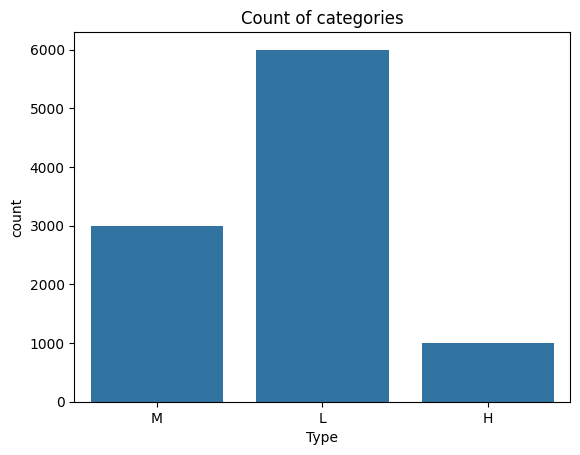

In [28]:
plt.title("Count of categories")
sns.countplot(data=df_raw, x=df_raw["Type"]);

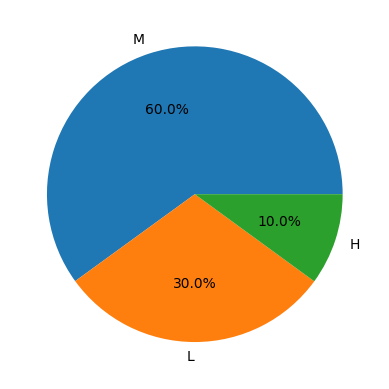

In [29]:
plt.pie(df_raw['Type'].value_counts(), labels=df_raw['Type'].unique(), autopct='%1.1f%%');

As we can see, the distribution of the different categories of this variable is not balanced. 60% of the records belong to medium quality products, 30% to low and 10% to high. This situation may need to be addressed before training any model, as this imbalance of categories may generate errors in the models.

### 4. Air temperature [K]

In [30]:
df_raw["Air temperature [K]"].head()

0    298.1
1    298.2
2    298.1
3    298.2
4    298.2
Name: Air temperature [K], dtype: float64

This column provides us information about the temperature of the air in Kelvin.

In [31]:
df_raw["Air temperature [K]"].agg(['max', 'min', 'mean', 'median', 'std'])

max       304.500000
min       295.300000
mean      300.004930
median    300.100000
std         2.000259
Name: Air temperature [K], dtype: float64

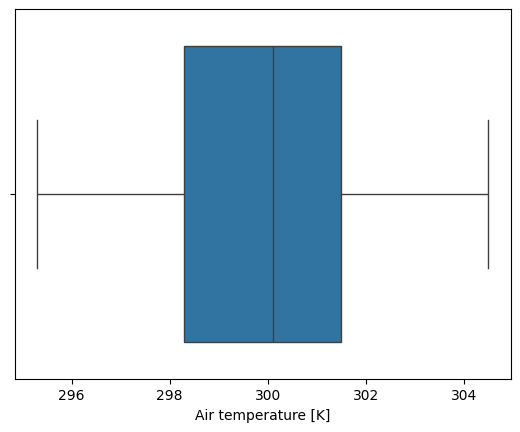

In [32]:
sns.boxplot(df_raw["Air temperature [K]"], orient="h");

As we can see in the box plot, values are distributed more or less normally, with a little negative skewness, meaning it is slightly skewed to the left. The median is located almost exactly at 300K, with a standard deviation of around 2K, as Q1 is located around 298K and Q3 around 302K. We can see there are no outliers.

### 5. Process temperature [K]

In [33]:
df_raw["Process temperature [K]"].head()

0    308.6
1    308.7
2    308.5
3    308.6
4    308.7
Name: Process temperature [K], dtype: float64

This variable includes, more or less, the value of the Air temperature variable, plus 10K.

In [34]:
df_raw["Process temperature [K]"].agg(['max', 'min', 'mean', 'median', 'std'])

max       313.800000
min       305.700000
mean      310.005560
median    310.100000
std         1.483734
Name: Process temperature [K], dtype: float64

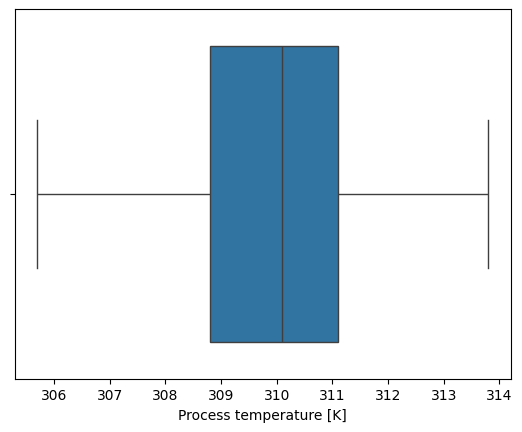

In [35]:
sns.boxplot(df_raw["Process temperature [K]"], orient="h");

As we see in the box plot, the distribution of this variable is pretty similar to the Air temperature [K] one. No outliers are perceived.

### 6. Rotational speed [rpm]

In [36]:
df_raw["Rotational speed [rpm]"].head()

0    1551
1    1408
2    1498
3    1433
4    1408
Name: Rotational speed [rpm], dtype: int64

In [37]:
df_raw["Rotational speed [rpm]"].agg(['max', 'min', 'mean', 'median', 'std'])

max       2886.000000
min       1168.000000
mean      1538.776100
median    1503.000000
std        179.284096
Name: Rotational speed [rpm], dtype: float64

This variable gives us information about the rotational speed of a part of the machine, exposed in revolutions per minute (rpm). This is calculated taking into account a power of 2860W. Some normally distributed noise is added to give the variable a more realistic approach.

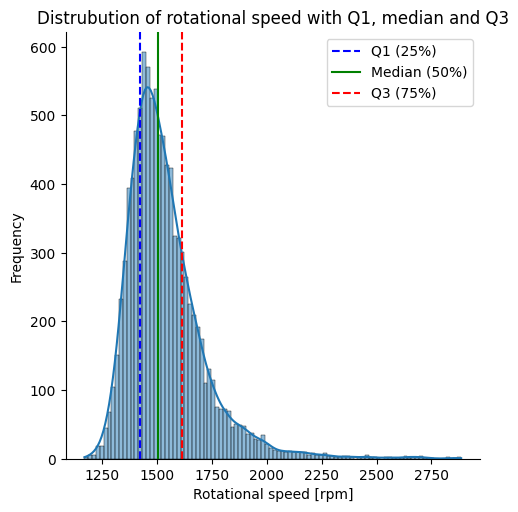

In [42]:
q1 = np.percentile(df_raw["Rotational speed [rpm]"], 25)
median = np.percentile(df_raw["Rotational speed [rpm]"], 50)
q3 = np.percentile(df_raw["Rotational speed [rpm]"], 75)

sns.displot(df_raw["Rotational speed [rpm]"], kde=True)

plt.axvline(q1, color='blue', linestyle='--', label='Q1 (25%)')
plt.axvline(median, color='green', linestyle='-', label='Median (50%)')
plt.axvline(q3, color='red', linestyle='--', label='Q3 (75%)')

plt.legend()
plt.xlabel("Rotational speed [rpm]")
plt.ylabel("Frequency")
plt.title("Distrubution of rotational speed with Q1, median and Q3")
plt.show()

In [60]:
q1 = np.percentile(df_raw["Rotational speed [rpm]"], 25)
q3 = np.percentile(df_raw["Rotational speed [rpm]"], 75)
iqr = q3 - q1

outliers_upper_limit = df_raw["Rotational speed [rpm]"][df_raw["Rotational speed [rpm]"]  > (q3 + 1.5 * iqr)]
print(f"Quantity of outliers: {len(outliers_upper_limit)}")

outliers_percentage = len(outliers_upper_limit) / df_raw["Rotational speed [rpm]"].count() * 100
print(f"Percentage of outliers out of the total: {outliers_percentage}%")

Quantity of outliers: 418
Percentage of outliers out of the total: 4.18%


As can be seen in the density plot, the variable is clearly distributed with a positive skewness, as the maximum value of 2886 is much further away from the median (1503) than the minimum value of 1168. We need to consider if those outliers simply add noise to our future models or whether they provide us with key information about when a machine is likely to suffer from a failure.

Taking into account that, by standard, we consider to be an outlier any point over Q3 plus 1.5 times the interquartile range, 4.18% of values lay over that limit.

### 7. Torque [Nm]

In [61]:
df_raw["Torque [Nm]"].head()

0    42.8
1    46.3
2    49.4
3    39.5
4    40.0
Name: Torque [Nm], dtype: float64

In [62]:
df_raw["Torque [Nm]"].agg(['max', 'min', 'mean', 'median', 'std'])

max       76.600000
min        3.800000
mean      39.986910
median    40.100000
std        9.968934
Name: Torque [Nm], dtype: float64

This variable indicates the metrics for the rotation power of the machine. It is represented in Newton-meters (Nm). 

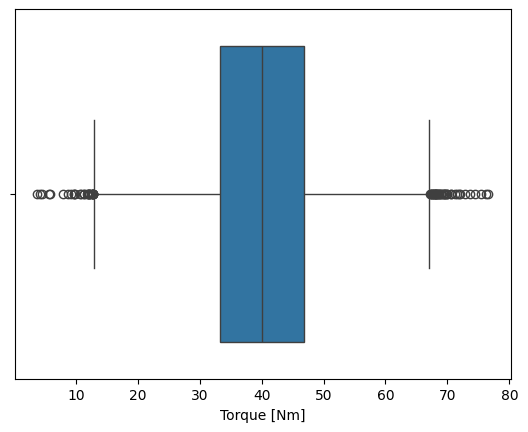

In [63]:
sns.boxplot(df_raw["Torque [Nm]"], orient="h");

The box plot indicates that the variable follows a pretty normal distribution, with a median of 40Nm and a sigma value of 10Nm. We will create a distribution plot to see how the outliers present in this variable behave. We will plot a curve for the normal distribution in order to graphically see if the variable follows distribution or not.

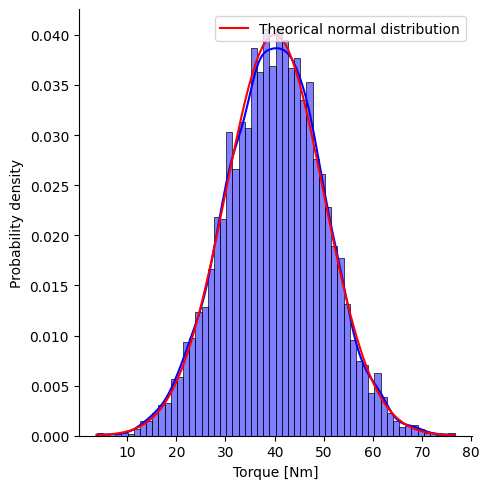

In [80]:
mean = df_raw["Torque [Nm]"].mean()
std_dev = df_raw["Torque [Nm]"].std()

sns.displot(df_raw["Torque [Nm]"], kde=True, color="blue", stat="density")

# Here we manually calculate the mean and standard deviation in order to plot the normal distribution curve
x = np.linspace(df_raw["Torque [Nm]"].min(), df_raw["Torque [Nm]"].max(), 100)
normal_dist = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

plt.plot(x, normal_dist, color="red", label="Theorical normal distribution")
plt.legend()
plt.xlabel("Torque [Nm]")
plt.ylabel("Probability density")
plt.show()

As we can see, the variable follows almost perfectly a normal distribution

### 8. Tool wear [min]

In [81]:
df_raw["Torque [Nm]"].head()

0    42.8
1    46.3
2    49.4
3    39.5
4    40.0
Name: Torque [Nm], dtype: float64

In [82]:
df_raw["Torque [Nm]"].agg(['max', 'min', 'mean', 'median', 'std'])

max       76.600000
min        3.800000
mean      39.986910
median    40.100000
std        9.968934
Name: Torque [Nm], dtype: float64

This variable represents the wear time that the tool suffers, represented in minutes. It is worth noting that high quality products add 5 minutes of tool wear, medium quality ones add 3 minutes and low quality ones add 2 minutes. This indicates that, in the case of high quality products, the tool needs a higher precision in the process, so that it suffers a higher time of wear. We will plot this variable in terms of the quality of the product in order to see this differenciation.

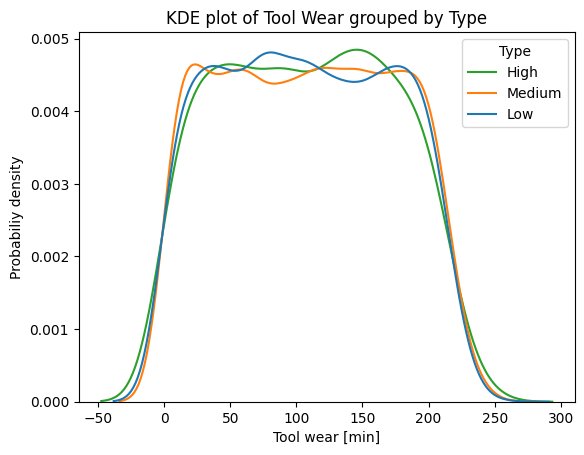

In [89]:
sns.kdeplot(data=df_raw, x="Tool wear [min]", hue="Type", common_norm=False)

plt.title('KDE plot of Tool Wear grouped by Type')
plt.xlabel('Tool wear [min]')
plt.ylabel('Probabiliy density')
plt.legend(title='Type', labels=['High', 'Medium', 'Low'])
plt.show()

All three curves appear to be similar, which suggests that tool wear in all product types is evenly distributed. However, we can see slight differences among the density curves. The line in green, representing high quality products, appears to be slightly displaced to the right, compared to the others. This indicates that high quality products may generate a higher tool wear, which is totally reasonable. Differences between medium and low quality products are not as clear, in comparison to high quality ones. All in all, even though differences among the three qualities are visible, I believe it is right to say that this is not a factor that determines overall tool wear clearly.

### Target (binary)

This column will be the target or dependent variable for our simplest analysis, as it indicates whether the machine failed or not.

In [94]:
df_raw["Target"].head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [91]:
df_raw["Target"].unique()

array([0, 1])

In [99]:
failure_count = df_raw["Target"][df_raw["Target"] == 1].count()
not_failure_count = df_raw["Target"][df_raw["Target"] == 0].count()
failure_percentage = failure_count / df_raw["Target"].count() * 100

print(f"Count of failures: {failure_count}")
print(f"Count of not failures: {not_failure_count}")
print(f"Failure percentage: {failure_percentage} %")

Count of failures: 339
Count of not failures: 9661
Failure percentage: 3.39 %


As we see, target is notoriously imbalanced. There are only 3.39% of records showing a failure of the machine. Facing this situation, some balancing technique will be needed in order to adjust this imbalance.

### Failure Type

This column will act as a categoric target, indicating what kind of failure the machine experimented.

In [100]:
df_raw["Failure Type"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

As can be seen, there are 5 different failure types. Obviously, this column also includes "No Failure" which is present in the records that there was no failure at all (Target = 0). Let's analyse how this five types are distributed.

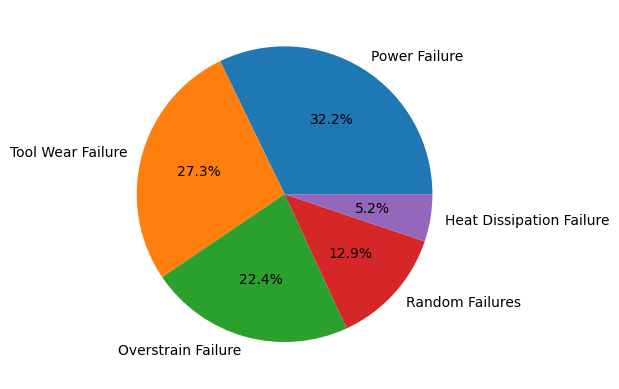

In [102]:
plt.pie(df_raw['Failure Type'][df_raw["Failure Type"] != "No Failure"].value_counts(), labels=df_raw['Failure Type'][df_raw["Failure Type"] != "No Failure"].unique(), autopct='%1.1f%%');

In this case, there is also an imbalance with the five different categories. Even though it is not as blatant as the imbalance with the binary target, we may need to apply some techniques in order to fix this before trying to programme any model